# Daily Energy

The most basic piece of information is the daily energy use from each microgrid.  The meter provides a kWh export field that we can sample on a daily basis to get this information.  

We perform this analysis for the grid in Ajau.  Ajau is near the north shore of Lake Sentani, has a full grid connection and about 100 households.


In [1]:
import pandas as pd
import os as os
import xlrd
import datetime
import matplotlib as plt
import numpy as np
%matplotlib inline

# read in raw CSV file for preprocessing
energy_file = open("../data-timeseries/Data_Logs Ajau Agustus.csv")

# dump lines from communications messages or empty lines and write to string
file_string = ''
omit_strings = ['Power Up', 'Communication Lost', 'Power Down', ',,,,,,,,,,,']
# there is information in the first 32 lines being dumped
for line in energy_file.readlines()[32:]:
    if not any(omit in line for omit in omit_strings):
        file_string += line

# use pre-parsed string to read in data file to pandas and sort by date
import io
energy_data = pd.read_csv(io.StringIO(file_string),
                      index_col=0, 
                      parse_dates=[0], 
                      thousands=',')
energy_data = energy_data.sort_index()

This is the raw data as stored by the meter.  You can observe a slight daily pattern but I'd need to zoom in to see it better.  On a grid-connected location, this lack of variability makes sense.

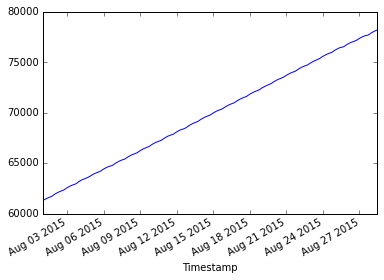

In [2]:
energy_data['kWh export'].plot()

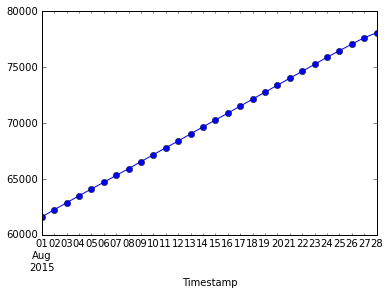

In [3]:
energy = energy_data['kWh export']
energy.resample('D').plot(marker='o')

We can also take the difference of this and we get the daily energy use as reported by the export field from the meter.

This looks like a daily energy of about 600 to 650 kWh per day or about 6 kWh per day per structure.  This also appears to be much more consistent.  I'm not sure what is going on at the end of the month.

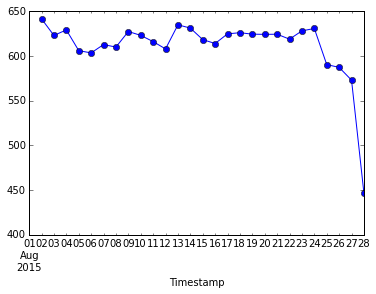

In [4]:
energy.resample('D').diff().plot(marker='o')